## Plotting and saving results

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data

In [2]:
csv_df = pd.read_csv('results.csv', names = ['dataset',
                                             'model',
                                             'is_stratified',
                                             'missing_class',
                                             'variable',
                                             'metric',
                                             'value'])

The following cell performs renaming operations on the "model" column in the dataframe. It also combines the "dataset" and "model" columns to modify the model names in the dataframe to provide more descriptive names for plotting purposes.

In [3]:
csv_df["model"] = csv_df["dataset"] + "-" + csv_df["model"]

rename = {'MNIST-MLP': "MNIST-MLP",
          'MNIST-CNN': "MNIST-CNN", 
          'Fashion-MNIST-CNN': "Fashion-MNIST", 
          'CIFAR-10-CNN': "CIFAR-10"}

csv_df["model"]= csv_df["model"].map(rename)

## Plots for summary

The plot_model_comparison function is used to generate a bar plot that visualizes the performance metrics of different models. The metric can be set to _accuracy_ or _loss_. The performance of the models across different datasets is visualized, allowing for easy comparison and analysis.

In [4]:
np.arange(csv_df["variable"].nunique()-1)

array([0, 1, 2, 3, 4, 5])

In [5]:
def plot_model_comparison(df, hidden, strat, metric = "accuracy"):
    '''
    Generates a bar plot to visualize the performance metrics of different 
    models.

    Args:
        df (DataFrame): A DataFrame containing the data to be plotted.
        hidden (str): The name of the missing class.
        strat (str): The stratification method used.
        metric (str, optional): The metric to be plotted (default is 
        "accuracy"). Can also be "loss".
    '''
    x = np.arange(df["variable"].nunique())
    spacing = [-.4, -.2, 0, .2]
    colors = ["#588b8b", "#f7b267", "#af5b5b", "#1d6da5"]
     
    if metric == "accuracy":
        df = df.loc[df["metric"] == "accuracy", :]
    else:
        df = df.loc[df["metric"] == "loss", :]

    ymin = df["value"].min() - df["value"].min()/7
    ymax = df["value"].max() + df["value"].max()/7
    plt.style.use('ggplot')
    plt.figure(figsize=(8, 5))

    for i, model in enumerate(df["model"].unique()):
        if metric == "accuracy":
            plt.bar(np.arange(
                df.loc[df["model"] == model, "variable"].nunique()) \
                    + spacing[i], \
                    df.loc[df["model"] == model, "value"], 
                    width = 0.2, 
                    label = model, 
                    color = colors[i])
            plt.ylabel("Accuracy")
            # plt.ylim(0.5, 1.05)
            plt.ylim(ymin, ymax)
        else:
            plt.bar(np.arange(
                df.loc[df["model"] == model, "variable"].nunique()) \
                    + spacing[i], \
                    df.loc[df["model"] == model, "value"], 
                    width = 0.2, 
                    label = model, 
                    color = colors[i])
            plt.ylabel("Loss")
 
            plt.ylim(0, ymax)
    
    plt.legend(loc = "upper left", ncol = 4)     
 
    plt.xticks(ticks = x,
                labels=[r"$M_{baseline}$",
                        r"$M_{0}$",
                        r"$M_{ES_3}$", 
                        r"$M_{ES_5}$", 
                        r"$M_{ES_{10}}$", 
                        r"$M_{ES_{15}}$", 
                        r"$M_{ES_{50}}$"],
                        )
    plt.title(f"Missing class: {hidden}. Stratified: {strat}")
    plt.xlabel("Model")

The function below generates and saves plots based on certain conditions. It loops through different combinations of boolean values for variables i and j and calls the plot_model_comparison function to generate plots.

If save_plots is True, the code saves the plot. The filename indicates whether the plot represents accuracy or loss, based on the value of the metric variable.

If save_plots is False, the code continues to the next iteration of the loop without saving the plot.

In [17]:
def generate_model_comparison_plots(df, save_plots = True, metric = "accuracy"):
    '''
    Generates comparison plots for different models based on specified criteria.

    Args:
        df (DataFrame): A DataFrame containing the data for model comparison.
        save_plots (bool, optional): Determines whether to save the generated 
        plots (default is True).
        metric (str, optional): The metric to be used for comparison (default 
        is "accuracy"). Can also be "loss".
    '''

    for i in [True, False]:
        for j in [False, True]:
            df_temp = csv_df.loc[(csv_df["is_stratified"] == i) & \
                                (csv_df["missing_class"] == j), :]

            plot_model_comparison(df_temp, j, i, metric = metric)

            if save_plots: 
                if metric == "accuracy":
                    plt.savefig(f"figures/Summary/models_acc_{'T' if i == True else 'F'}{'T' if j == True else 'F'}.png")
                else:
                    plt.savefig(f"figures/Summary/models_loss_{'T' if i == True else 'F'}{'T' if j == True else 'F'}.png")

            else:
                continue

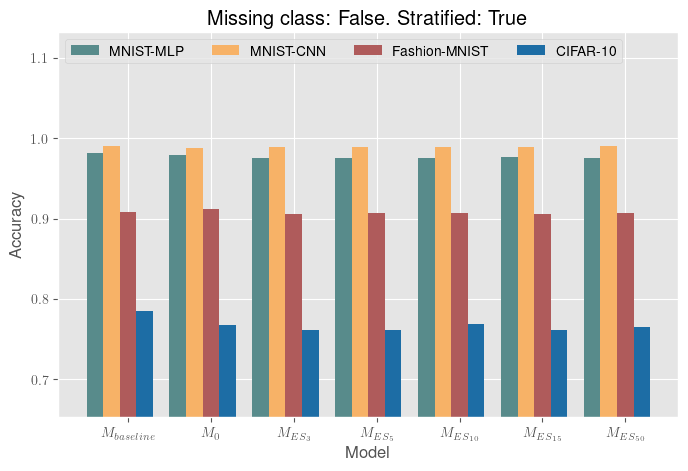

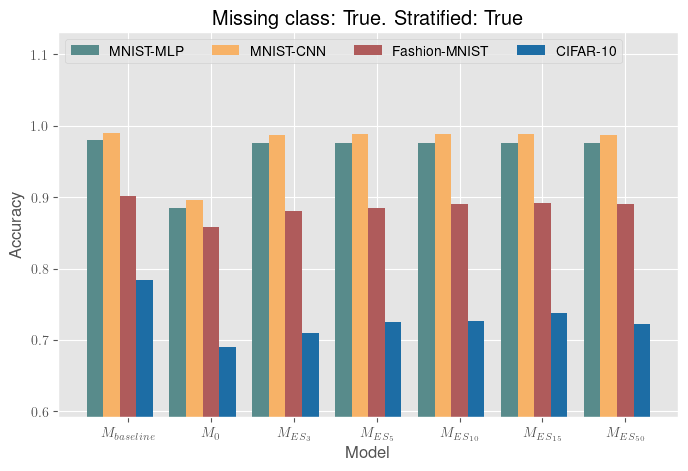

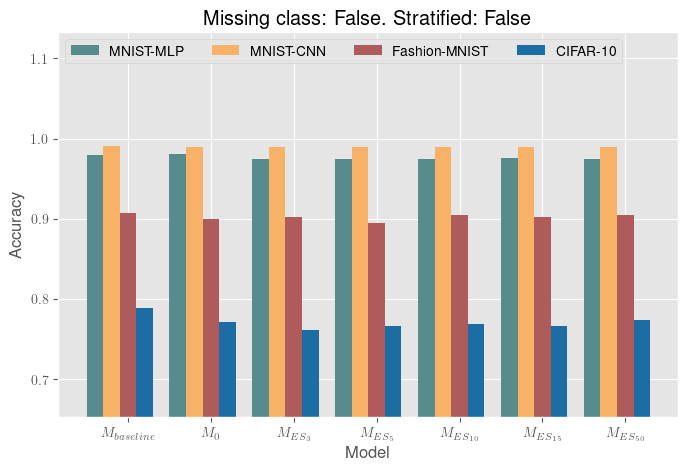

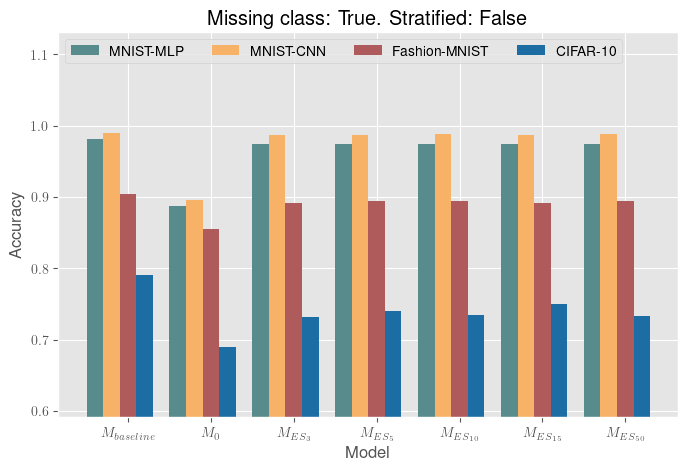

In [20]:
generate_model_comparison_plots(df = csv_df, save_plots = True, metric = "accuracy")

## Plotting results per split type

The model_performance_plot function generates a bar plot to visualize the results for a specific model. The function iterates over the columns in the dataframe to create bar plots for each column, with the x-axis representing the different models. Additionally, a horizontal dashed line is added to indicate the baseline performance. 

In [8]:
def model_performance_plot(df, model, hidden, strat, cols, metric = "accuracy"):
    '''
    Generates a bar plot to visualize the results for a specific model.

    Args:
        df (DataFrame): A DataFrame containing the data to be plotted.
        model (str): The name of the model.
        hidden (str): The name of the missing class.
        strat (str): The stratification method used.
        cols (list): A list of column names to plot.
        metric (str, optional): The metric to be plotted (default is 
        "accuracy"). Can also be "loss".
    '''
    ymin = round(df[cols[3:]].min().min() - 0.1, 2)
    ymax = df[cols[1:]].max().max() + 0.06

    plt.style.use('ggplot')
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })

    if metric == "accuracy":                
        baseline = df["m_baseline"].min()
        plt.figure(figsize=(8,6))
        plt.ylabel("Accuracy")
        plt.ylim((ymin, baseline + 0.015))
    else:
        baseline = df["m_baseline"].min()
        plt.figure(figsize=(5,4)) 
        plt.ylabel("Loss")
        plt.ylim((0, ymax))
    
   
    plt.suptitle(f"{model}")
    
    plt.title(f"Missing class: {hidden}. Stratified: {strat}")

    for col in df[cols[1:]]:
        plt.bar(x = col, height= df[col])
    
    plt.axhline(y=baseline, color='r', linestyle='--')
    plt.legend([r"$M_{baseline}$"], loc = "upper right")

    plt.xticks(ticks = [0, 1, 2, 3, 4, 5], 
               labels = [r"$M_{0}$", 
                         r"$M_{ES_3}$", 
                         r"$M_{ES_5}$", 
                         r"$M_{ES_{10}}$", 
                         r"$M_{ES_{15}}$", 
                         r"$M_{ES_{50}}$",
                         ])
    plt.xlabel("Model")

The code below processes the given dataframe, generates plots, and saves them if specified.

In [9]:
def process_and_plot(df, save_plots=True, metric="accuracy"):
    '''
    Processes the given DataFrame, generates plots, and saves them if specified.

    Args:
        csv_df (DataFrame): The input DataFrame to be processed and plotted.
        metric (str, optional): The metric to use for processing and plotting 
        (default is "accuracy"). Can also be "loss".
        save_plots (bool, optional): Indicates whether to save the generated 
        plots (default is True).
    '''
    metric = "accuracy"
    save_plots = True

    df = df.loc[df["metric"] == metric, :]

    df_pivot = pd.pivot_table(df, index = ["model", 
                                        "is_stratified", 
                                        "missing_class"], 
                                        values = "value", 
                                        columns = "variable").reset_index()

    df_pivot = df_pivot.loc[:, ['model', 
                                'is_stratified', 
                                'missing_class',  
                                'm_baseline', 
                                'm0', 
                                'mes3', 
                                'mes5',
                                'mes10', 
                                'mes15', 
                                'mes50',
                                ]]

    cols = df_pivot.columns[3:]

    for model in df_pivot["model"].unique():        
        for hidden in df_pivot["missing_class"].unique():
            for strat in df_pivot["is_stratified"].unique():      
                df_filtered = df_pivot.loc[(df_pivot["model"] == model) &\
                                        (df_pivot["missing_class"] == hidden) &\
                                        (df_pivot["is_stratified"] == strat), :]
            
                model_performance_plot(df = df_filtered, 
                            model = model, 
                            hidden = hidden, 
                            strat = strat, 
                            cols = cols, 
                            metric = metric)
                
                if save_plots and metric == "accuracy":
                    plt.savefig(f"figures/{model}/acc_{model}_{'T' if strat == True else 'F'}{'T' if hidden == True else 'F'}.png")
                elif save_plots and metric != "accuracy":
                    plt.savefig(f"figures/{model}/loss_{model}_{'T' if strat == True else 'F'}{'T' if hidden == True else 'F'}.png")
                else:
                    continue

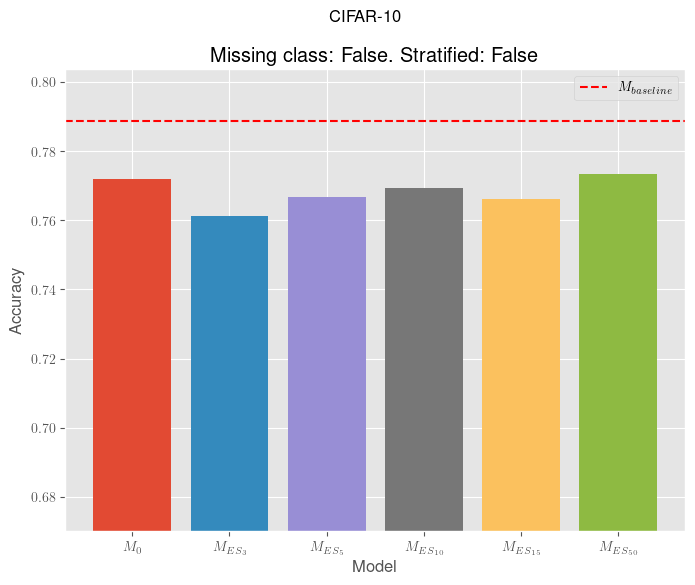

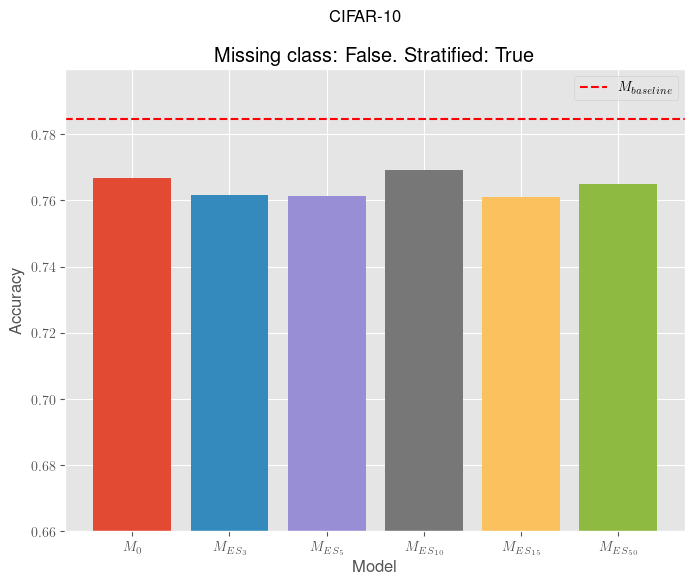

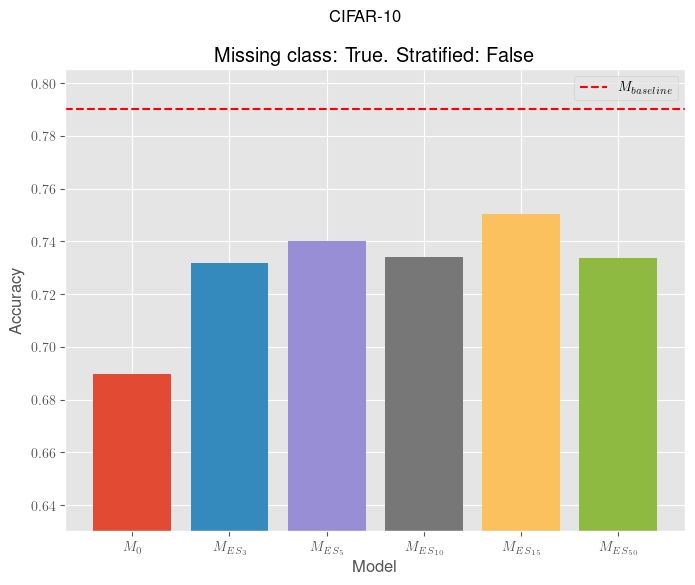

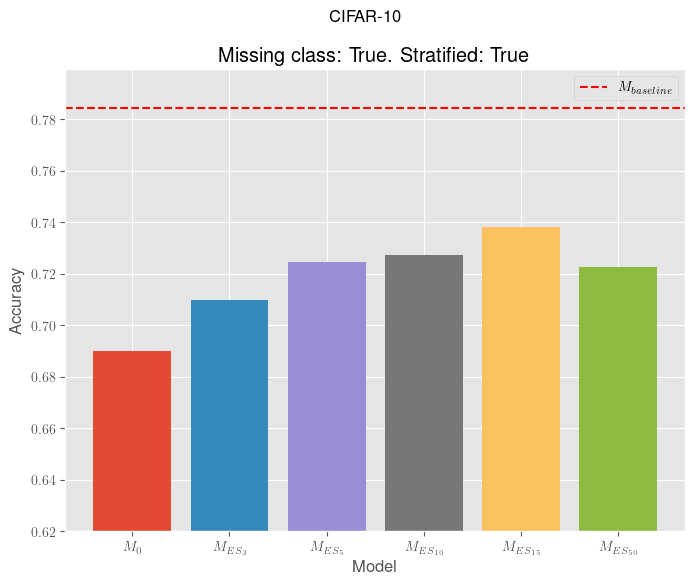

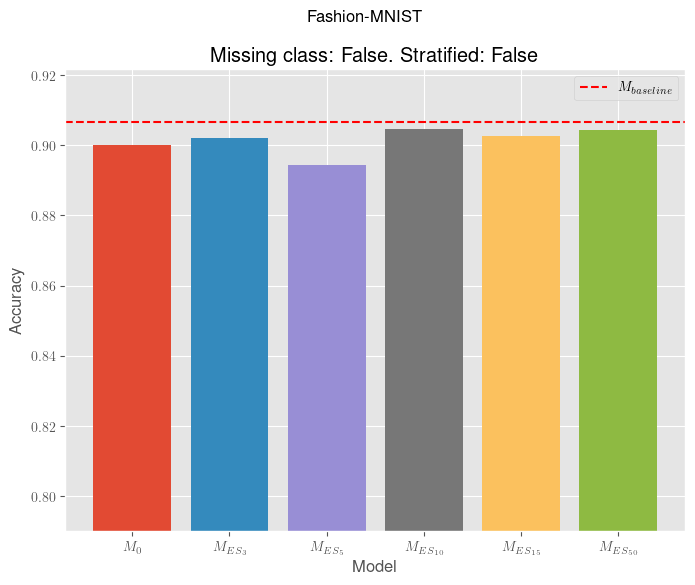

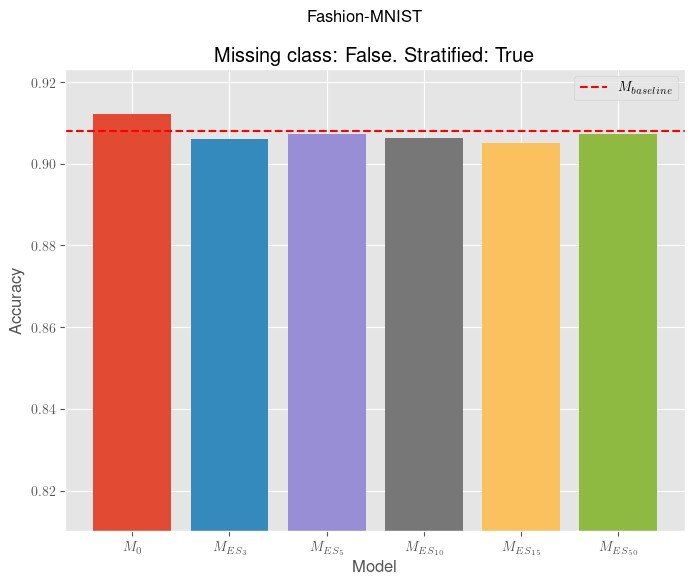

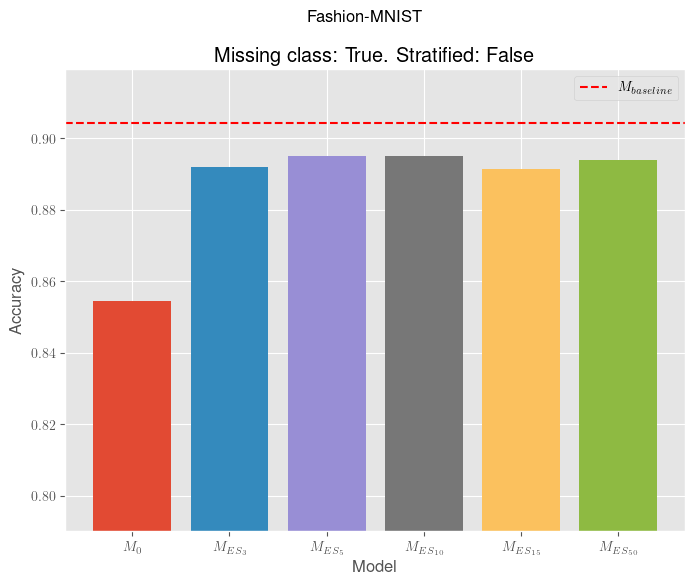

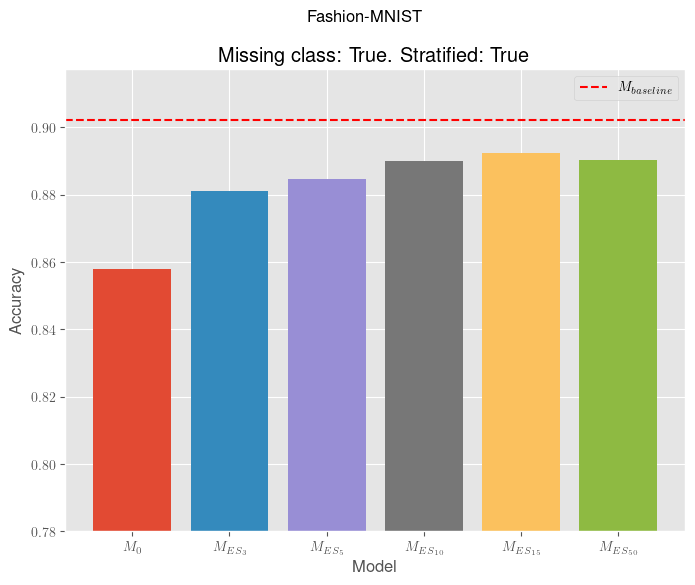

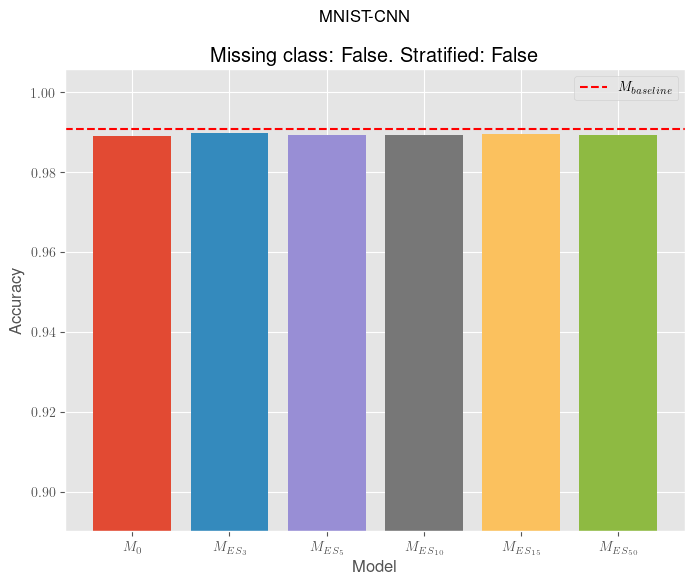

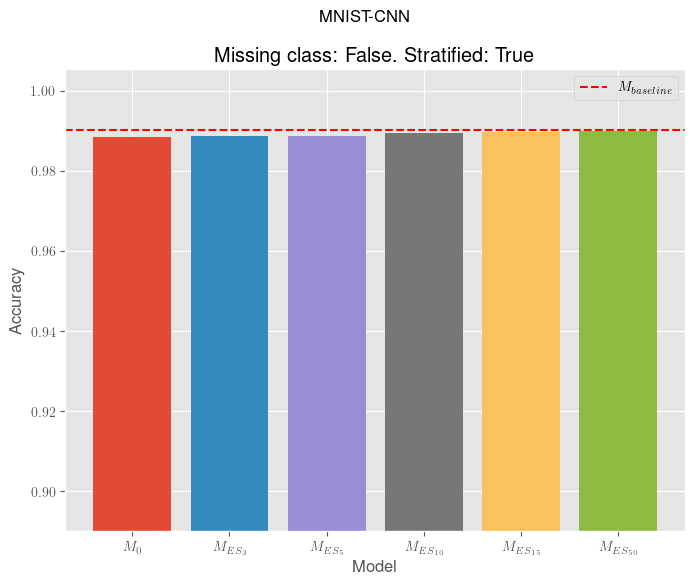

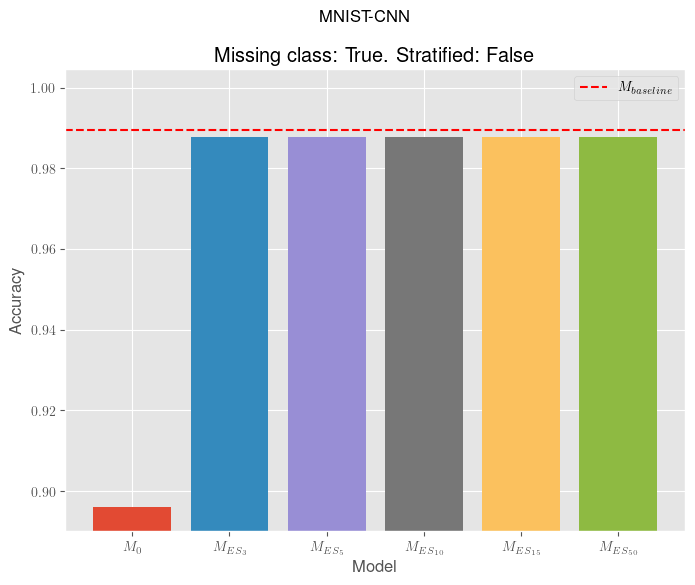

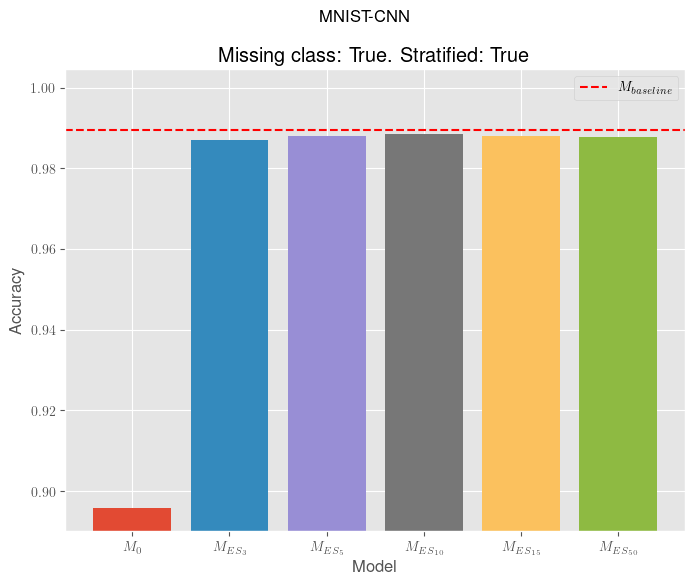

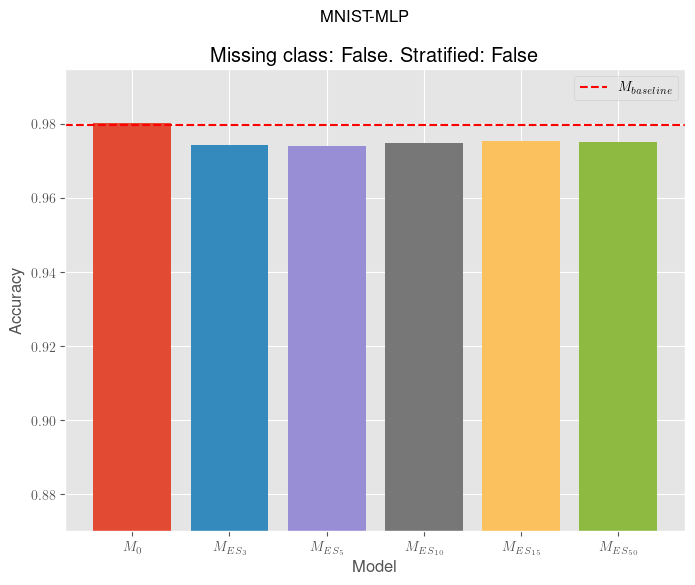

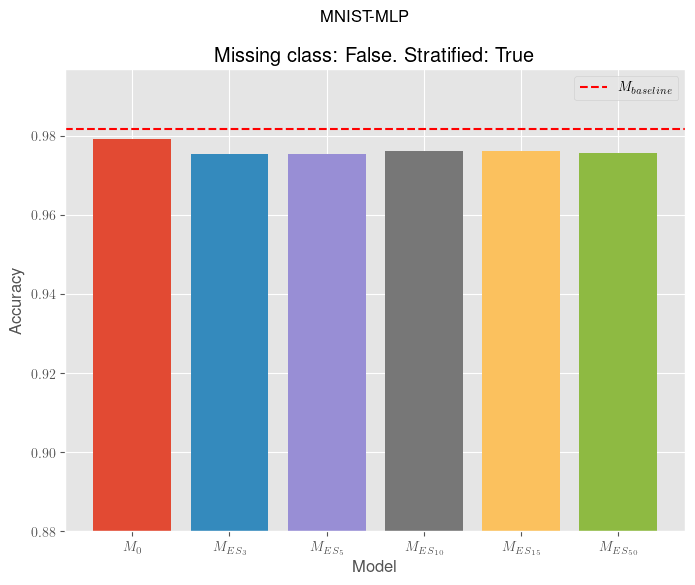

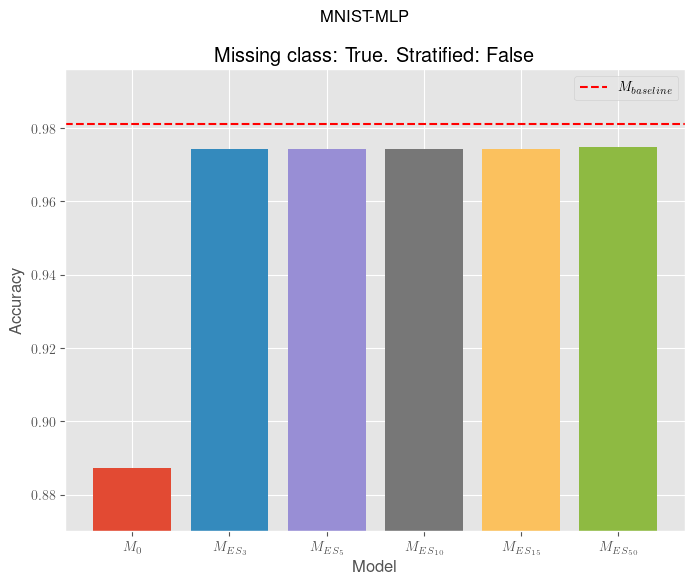

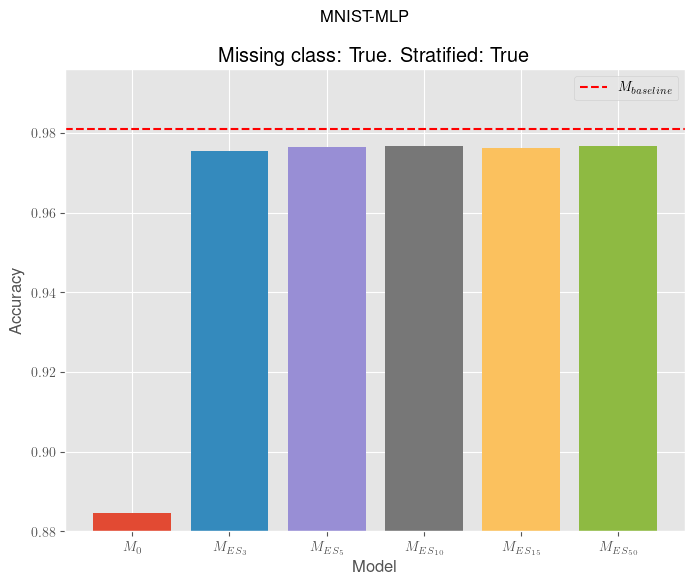

In [10]:
process_and_plot(df = csv_df, metric="accuracy", save_plots=True)